In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report


In [24]:
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")

print(f"Training data: {X_train.shape}")
print(f"Test data: {X_test.shape}")
print(f"Emotions range: {np.min(y_train)} to {np.max(y_train)}")

Training data: (100, 48, 48, 1)
Test data: (20, 48, 48, 1)
Emotions range: 0 to 6


In [25]:
X_train_tensor = torch.FloatTensor(X_train).permute(0, 3, 1, 2)  # Channels first
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test).permute(0, 3, 1, 2)
y_test_tensor = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("PyTorch datasets and dataloaders created!")

PyTorch datasets and dataloaders created!


In [27]:
class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        
        self.flattened_size = 128 * 6 * 6
        
        self.fc1 = nn.Linear(self.flattened_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, self.flattened_size)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = EmotionCNN(num_classes=7)
print("CNN Model built successfully!")
print(f"Total parameters: {sum(p.numel() for p in model.parameters())}")

CNN Model built successfully!
Total parameters: 1306375


In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_accuracies = []

print("Training setup complete!")
print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")

Training setup complete!
Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [29]:
print("Training Epoch 1...")
model.train()
running_loss = 0.0

for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

avg_loss = running_loss / len(train_loader)
train_losses.append(avg_loss)
print(f"Epoch 1 - Loss: {avg_loss:.4f}")

Training Epoch 1...
Epoch 1 - Loss: 1.9556


In [13]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
val_accuracies.append(accuracy)
print(f"Epoch 1 - Validation Accuracy: {accuracy:.2f}%")

Epoch 1 - Validation Accuracy: 5.00%


In [30]:
print("Training Epochs 2-5...")
for epoch in range(2, 6):
    model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)
    print(f"Epoch {epoch} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

Training Epochs 2-5...
Epoch 2 - Loss: 1.9354, Accuracy: 20.00%
Epoch 3 - Loss: 1.9518, Accuracy: 20.00%
Epoch 4 - Loss: 1.9498, Accuracy: 20.00%
Epoch 5 - Loss: 1.9281, Accuracy: 20.00%


In [31]:
print("Training Epochs 6-10...")
for epoch in range(6, 11):
    model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)
    print(f"Epoch {epoch} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

Training Epochs 6-10...
Epoch 6 - Loss: 1.9357, Accuracy: 20.00%
Epoch 7 - Loss: 1.9608, Accuracy: 20.00%
Epoch 8 - Loss: 1.9457, Accuracy: 20.00%
Epoch 9 - Loss: 1.9323, Accuracy: 20.00%
Epoch 10 - Loss: 1.9630, Accuracy: 20.00%


In [16]:
model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

accuracy = accuracy_score(all_targets, all_predictions)
print(f"\nFINAL MODEL EVALUATION:")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


FINAL MODEL EVALUATION:
Test Accuracy: 0.2500 (25.00%)


In [ ]:
emotion_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print("\nDetailed Classification Report:")
print(classification_report(all_targets, all_predictions, target_names=emotion_names))


📈 Detailed Classification Report:
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00         4
     Disgust       0.00      0.00      0.00         1
        Fear       0.25      1.00      0.40         5
       Happy       0.00      0.00      0.00         4
         Sad       0.00      0.00      0.00         3
    Surprise       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.04      0.14      0.06        20
weighted avg       0.06      0.25      0.10        20



c:\Users\bhavika balu bhadane\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhavika balu bhadane\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhavika balu bhadane\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, "data/emotion_cnn_model.pth")

print("Model saved as: data/emotion_cnn_model.pth")

Model saved as: data/emotion_cnn_model.pth


In [34]:
emotion_predictions = np.array(all_predictions)
np.save("data/emotion_predictions.npy", emotion_predictions)

print("Emotion predictions saved as: data/emotion_predictions.npy")
print("Ready for music recommendation system!")

Emotion predictions saved as: data/emotion_predictions.npy
Ready for music recommendation system!


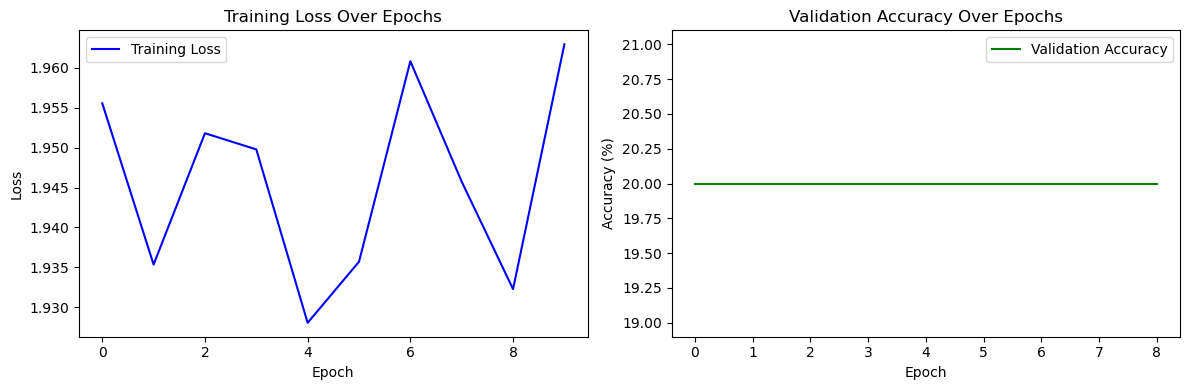

training plots saved as: data/training_history.png


In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b-', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, 'g-', label='Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.savefig("data/training_history.png")
plt.show()

print("training plots saved as: data/training_history.png")